# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

# Importing the Dataset

In [2]:
dataset = pd.read_csv('tough_dataset.csv', encoding = "ISO-8859-1")

# Exploratory Data Analysis

In [3]:
pd.set_option('max_columns', None)
dataset.head(15)

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetai

In [4]:
len(dataset)

2946

In [5]:
dataset.describe()

,id,Target A,Target B,LOAN_AMT,dti,last_pymnt_amnt
count,2.946000e+03,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000
mean,6.830623e+07,58904.139794,0.210115,15345.663612,19.444117,4663.227026
std,1.814269e+06,26986.575936,0.407460,8636.391303,8.628543,6855.297610
min,3.617740e+05,0.000000,0.000000,1000.000000,0.000000,0.030000
25%,6.837622e+07,49390.000000,0.000000,8681.250000,13.035000,362.980000
50%,6.846507e+07,58440.000000,0.000000,14400.000000,18.905000,842.235000
75%,6.853764e+07,73171.750000,0.000000,20000.000000,25.580000,6832.185000
max,6.861706e+07,218587.000000,1.000000,35000.000000,51.200000,35467.750000


In [6]:
dataset.dtypes

id                      int64
Target A              float64
Target B                int64
LOAN_AMT                int64
Business Title         object
                       ...   
earliest_cr_line       object
last_pymnt_d           object
last_pymnt_amnt       float64
next_pymnt_d           object
last_credit_pull_d     object
Length: 69, dtype: object

## Missing Values

<AxesSubplot:>

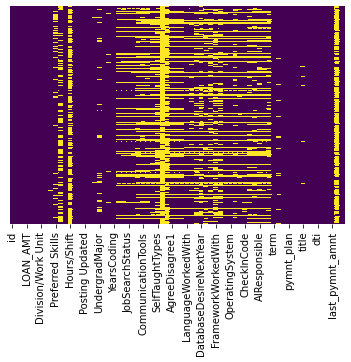

In [7]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:>

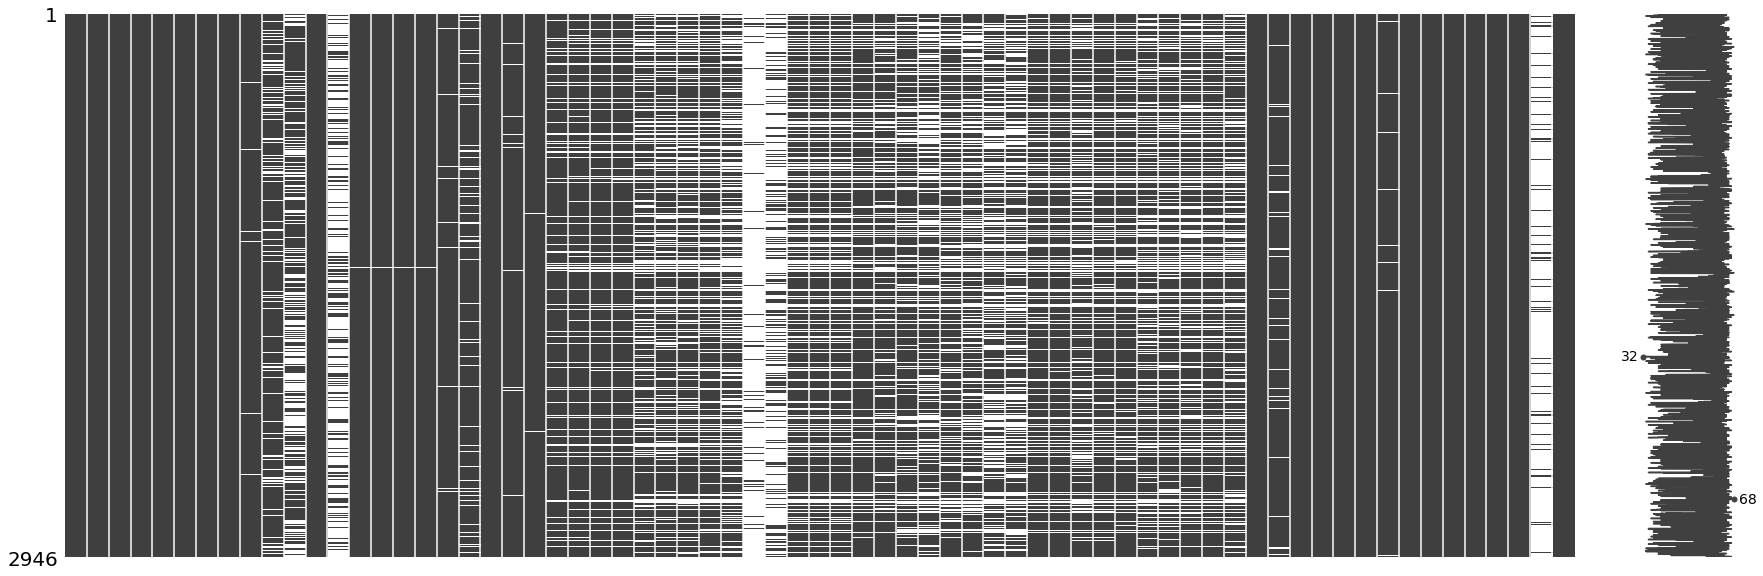

In [8]:
missingno.matrix(dataset, figsize = (30,10))

In [9]:
dataset.isnull().sum()

id                       0
Target A                 0
Target B                 0
LOAN_AMT                 0
Business Title           0
                      ... 
earliest_cr_line         0
last_pymnt_d             0
last_pymnt_amnt          0
next_pymnt_d          2610
last_credit_pull_d       0
Length: 69, dtype: int64

# Taking care of missing values
## Dropping columns with too many missing values(Threshold = 25% missing values)

In [46]:
df_temp = pd.DataFrame()
for column in dataset:
    missing = dataset.isnull().sum()[column]
    missing_percentage = missing/len(dataset)
    if missing_percentage < 0.10:
        df_temp[column] = dataset[column]

<AxesSubplot:>

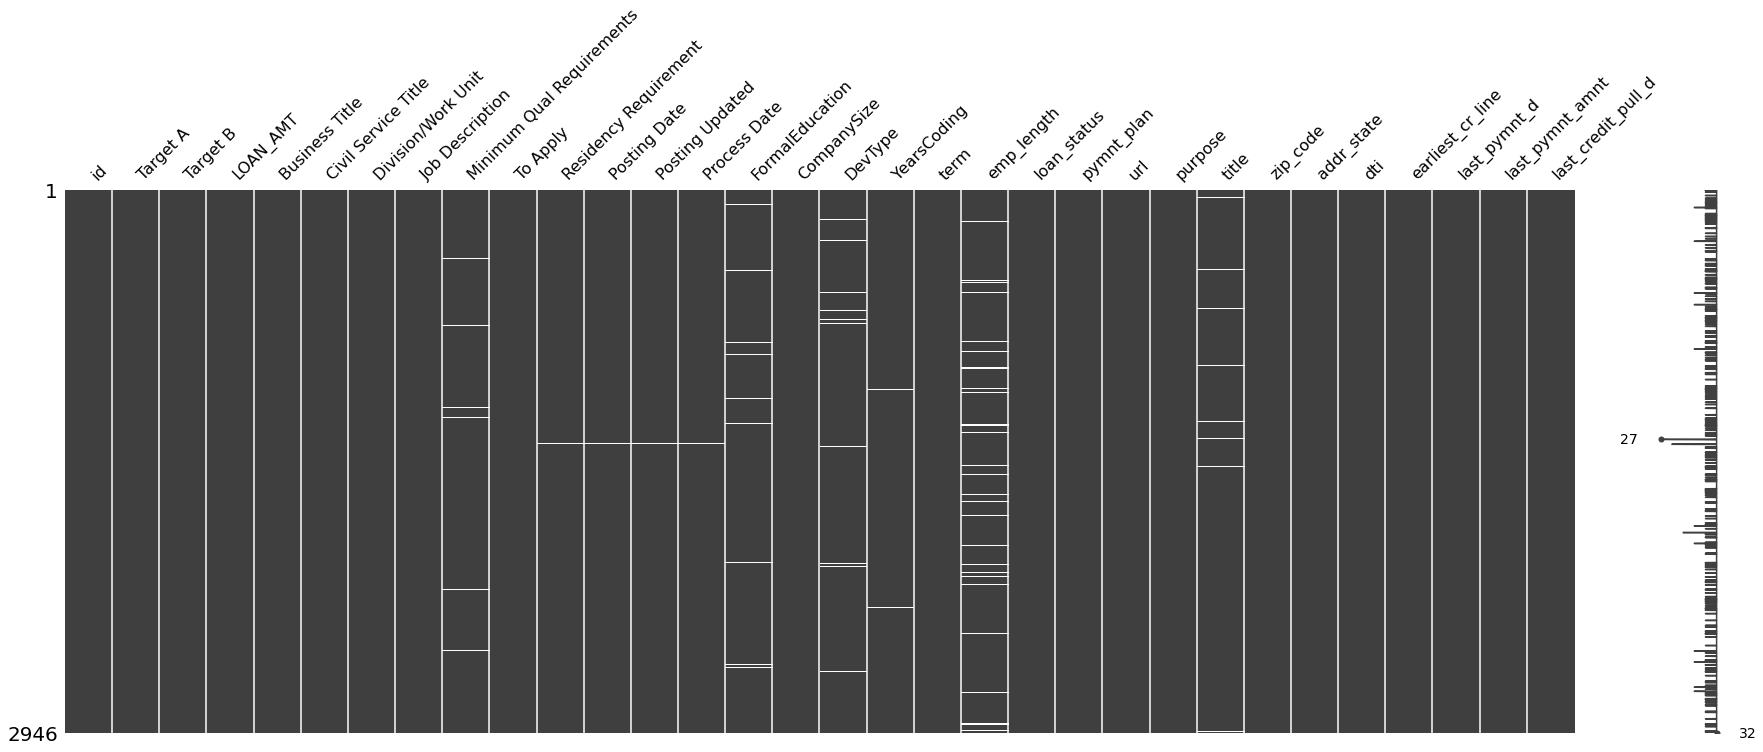

In [47]:
missingno.matrix(df_temp, figsize = (30,10))

In [12]:
len(df_temp.columns)

44

## Exploring each feature individually

In [13]:
pd.set_option('max_columns', None)
df_temp.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,To Apply,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,LanguageWorkedWith,LanguageDesireNextYear,IDE,OperatingSystem,VersionControl,CheckInCode,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Komodo;Vim;Visual Studio Code,Linux-based,Git,Multiple times per day,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,JavaScript;Python;Bash/Shell,Go;Python,IPython / Jupyter;Sublime Text;Vim,Linux-based,Git;Subversion,A few times per week,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,19-Mar
2,68341763,51907.68,0,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,60 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,Aug-00,17-Jun,15813.30,19-Mar
3,66310712,51907.68,0,35000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to 

In [14]:
df = pd.DataFrame()

### Target feature 1: Target A

In [35]:
df_temp.isnull().sum()['Target A']

0

<AxesSubplot:ylabel='Frequency'>

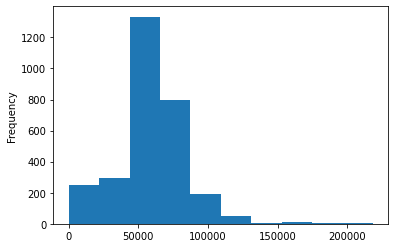

In [36]:
df_temp['Target A'].plot.hist()

In [37]:
df['Target A'] = df_temp['Target A']
df

,Target A,Target B,LOAN_AMT
0,42405.00,0,3600
1,60740.00,1,24700
2,51907.68,0,20000
3,51907.68,0,35000
4,35.00,1,10400
5,35.00,0,11950
6,50598.00,0,20000
7,50623.00,1,20000
8,90000.00,0,10000
9,30683.00,0,8000


### Target variable 2: Target B
will need to be balanced

0    2327
1     619
Name: Target B, dtype: int64


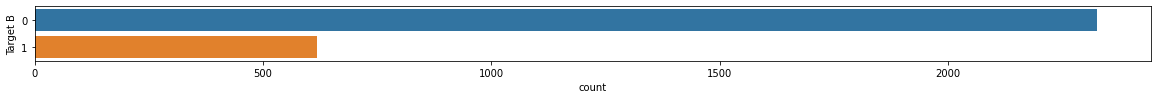

In [30]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Target B', data=dataset);
print(dataset['Target B'].value_counts())

In [34]:
print(f"0: {2327/len(df_temp) * 100}% \n1: {619/len(df_temp) * 100}%")

0: 78.98845892735913% 
1: 21.011541072640867%


In [38]:
df_temp.isnull().sum()['Target B']

0

In [39]:
df_temp['Target B'] = dataset['Target B']

### LOAN_AMT
will require feature scaling later

In [40]:
df_temp.isnull().sum()['LOAN_AMT']

0

<AxesSubplot:ylabel='Frequency'>

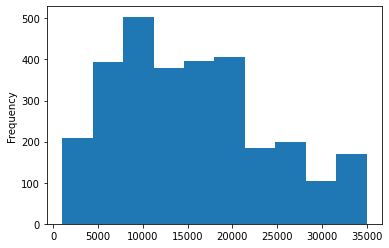

In [42]:
df_temp['LOAN_AMT'].plot.hist()

In [43]:
df['LOAN_AMT'] = df_temp['LOAN_AMT']

### Business Title

In [44]:
df_temp.isnull().sum()['Business Title']

0

In [45]:
len(df_temp['Business Title'].unique())

1244

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = dataset.columns[3:]

X = dataset[labels]
y = dataset['Target B']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/gaurang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Business Title, Civil Service Title, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Hours/Shift, Residency Requirement, Posting Date, Posting Updated, Process Date, FormalEducation, UndergradMajor, CompanySize, DevType, YearsCoding, YearsCodingProf, HopeFiveYears, JobSearchStatus, LastNewJob, UpdateCV, CommunicationTools, TimeFullyProductive, EducationTypes, SelfTaughtTypes, TimeAfterBootcamp, HackathonReasons, AgreeDisagree1, AgreeDisagree2, AgreeDisagree3, LanguageWorkedWith, LanguageDesireNextYear, DatabaseWorkedWith, DatabaseDesireNextYear, PlatformWorkedWith, PlatformDesireNextYear, FrameworkWorkedWith, FrameworkDesireNextYear, IDE, OperatingSystem, Methodology, VersionControl, CheckInCode, AIDangerous, AIInteresting, AIResponsible, AIFuture, Age, term, emp_length, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d